In [ ]:
#Created on 14 June 2022
#Last Modified on 19 July 2022
#FYP for Mr. Tian Kai Wen TP051580
#Computer Science (Intelligent system)
#Asia Pacific University
#Data filtration

#The code here is to filter dataset by filtering video that is corrupted or videos with not sufficient frame count
#Also, new json will be created by removing information of the removed videos.

In [ ]:
#Install and import libraries 
!pip install face_recognition
import glob
import torch
import torchvision
import os
import numpy as np
import cv2
import face_recognition
import shutil
import pandas as pd
import json
from torchvision import transforms
from google.colab import drive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 22 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=ab7d09b22f6594c7d222a6830d2fec9b7e36f96b02c0657fc22a5588a7fd67c0
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#To save file as json
def saveFile(data,dir):
  with open(dir,'w') as f:
    f.write(json.dumps(data,separators=(',',':')))

#To load the json file
def loadFile(dir):
  with open(dir,'r') as f:
    data=json.load(f)
  return data

#To remove that has less than 100 frame count
def removeVideo(v):
  cap=cv2.VideoCapture(v)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    listCorruptedVideoName.append((v.split('/')[6]))
    listCorruptedVideo.append(v)
    print(v+" has not enough frame count")

#To perform transform operation towards the video and concatenate the frames to validate the video
def validateVideo(videoPath,transform):
      count = 20
      frames = []
      for i,frame in enumerate(frameExtract(videoPath)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames

def frameExtract(path):
  vidObj = cv2.VideoCapture(path) 
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image



In [ ]:
size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = transforms.Compose([
                                transforms.ToPILImage(),
                                transforms.Resize((size,size)),transforms.ToTensor(),
                                transforms.Normalize(mean,std)])
videoDirectory =  glob.glob('/content/drive/My Drive/Deepfake dataset/dataset/*.mp4')
print("Total no of videos :" , len(videoDirectory))

#To extracct video that is corrupted
listCorruptedVideo=list()
listCorruptedVideoName=list()
for v in videoDirectory:
  try:
    validateVideo(v,transform)
    removeVideo(v)
  except:
    print(v+" is corrupted")
    print((v.split('/')[6]))
    listCorruptedVideoName.append((v.split('/')[6]))
    listCorruptedVideo.append(v)
    continue



Total no of videos : 622


In [ ]:
#To move the video in the listCorrupted video
for v in listCorruptedVideo:
  print(v)
  shutil.move(v,'/content/drive/MyDrive/Deepfake dataset/corrupted video/')

REAL    322
FAKE    300
Name: label, dtype: int64

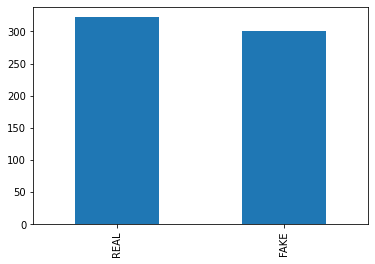

In [ ]:
import pandas as pd
import json
dfTrain = pd.read_json('/content/drive/MyDrive/Deepfake dataset/dataset/metadata.json').transpose()
dfTrain.head()
dfTrain.label.value_counts().plot.bar()
dfTrain.label.value_counts()

In [ ]:
#To read metadata json file as dictionary
jsonMetaFile=open('/content/drive/MyDrive/Deepfake dataset/dataset/metadata.json')
jsonMetaData=jsonMetaFile.read()
jsonMeta=json.loads(jsonMetaData)
print("Number of items in metadata: "+str(len(jsonMeta)))

#To remove videos that are corrupted in the dictionary
for name in listCorruptedVideoName:
  jsonMeta.pop(name)

print("Number of items after removing corrupted video:"+str(len(jsonMeta)))
saveFile(jsonMeta,'/content/drive/MyDrive/Deepfake dataset/dataset/metadata.json')
loadFile('/content/drive/MyDrive/Deepfake dataset/dataset/metadata.json')

Number of items in metadata: 622
Number of items after removing corrupted video:622


{'aagfhgtpmv.mp4': {'label': 'FAKE',
  'original': 'vudstovrck.mp4',
  'split': 'train'},
 'aamjfukxwp.mp4': {'label': 'REAL', 'split': 'train'},
 'aapnvogymq.mp4': {'label': 'FAKE',
  'original': 'jdubbvfswz.mp4',
  'split': 'train'},
 'abarnvbtwb.mp4': {'label': 'REAL', 'original': None, 'split': 'train'},
 'abqwwspghj.mp4': {'label': 'FAKE',
  'original': 'qzimuostzz.mp4',
  'split': 'train'},
 'acifjvzvpm.mp4': {'label': 'FAKE',
  'original': 'kbvibjhfzo.mp4',
  'split': 'train'},
 'acqfdwsrhi.mp4': {'label': 'FAKE',
  'original': 'ccfoszqabv.mp4',
  'split': 'train'},
 'acxnxvbsxk.mp4': {'label': 'FAKE',
  'original': 'fjlyaizcwc.mp4',
  'split': 'train'},
 'acxwigylke.mp4': {'label': 'FAKE',
  'original': 'ffcwhpnpuw.mp4',
  'split': 'train'},
 'aczrgyricp.mp4': {'label': 'FAKE',
  'original': 'slwkmefgde.mp4',
  'split': 'train'},
 'adohikbdaz.mp4': {'label': 'FAKE',
  'original': 'qjlhemtkxk.mp4',
  'split': 'train'},
 'adylbeequz.mp4': {'label': 'FAKE',
  'original': 'dlpoieqv

REAL    322
FAKE    300
Name: label, dtype: int64

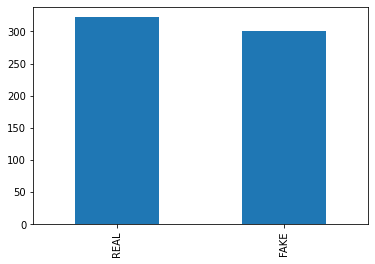

In [ ]:
dfTrain = pd.read_json('/content/drive/MyDrive/Deepfake dataset/dataset/metadata.json').transpose()
dfTrain.head()
dfTrain.label.value_counts().plot.bar()
dfTrain.label.value_counts()